In [3]:
import cv2
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os


In [4]:
N = ord("V") % 5 + 1
print(N)

2


In [5]:
file_path = r"D:\FastFile\PYTHON\Lab6.xlsx"
df = pd.read_excel(file_path)
df


,N,file name,image size,glasses color,line width
0,1,emma-watson2.jpg,300x300,red,2
1,2,emma-watson.jpg,400x400,blue,3
2,3,draco.jpg,700x700,cian,4
3,4,longbottom.jpg,600x600,magenta,5
4,5,ron_wesley.jpg,500x500,yellow,6


In [6]:
data_for_variant = df.iloc[N - 1]
data_for_variant


N                              2
file name        emma-watson.jpg
image size               400x400
glasses color               blue
line width                     3
Name: 1, dtype: object

In [7]:
def process_image(image_path, output_file, glasses_color=(255, 0, 0), thickness=2):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        return
    
    x, y, w, h = faces[0]
    face_image = gray[y:y+h, x:x+w]
    upper_half = face_image[:h//2, :]
    eyes = eye_cascade.detectMultiScale(upper_half, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
    
    if len(eyes) < 2:
        return
    
    eyes = sorted(eyes, key=lambda eye: eye[0])
    
    left_center = (x + eyes[0][0] + eyes[0][2] // 2, y + eyes[0][1] + eyes[0][3] // 2)
    right_center = (x + eyes[1][0] + eyes[1][2] // 2, y + eyes[1][1] + eyes[1][3] // 2)
    left_radius = max(eyes[0][2], eyes[0][3]) // 2
    right_radius = max(eyes[1][2], eyes[1][3]) // 2
    
    drawing = image.copy()
    
    cv2.circle(drawing, left_center, left_radius, glasses_color, thickness)
    cv2.circle(drawing, right_center, right_radius, glasses_color, thickness)
    
    left_edge = (left_center[0] + left_radius, left_center[1])
    right_edge = (right_center[0] - right_radius, right_center[1])
    cv2.line(drawing, left_edge, right_edge, glasses_color, thickness)
    
    left_arm = (left_center[0] - left_radius - 20, left_center[1])
    right_arm = (right_center[0] + right_radius + 20, right_center[1])
    cv2.line(drawing, (left_center[0] - left_radius, left_center[1]), left_arm, glasses_color, thickness)
    cv2.line(drawing, (right_center[0] + right_radius, right_center[1]), right_arm, glasses_color, thickness)
    
    resized_image = cv2.resize(drawing, (300, 300))
    cv2.imwrite(output_file, resized_image)


In [8]:
image_path = r"D:\FastFile\PYTHON\Images\emma-watson.jpg"
output_file = r"D:\FastFile\PYTHON\output.jpg"
process_image(image_path, output_file)


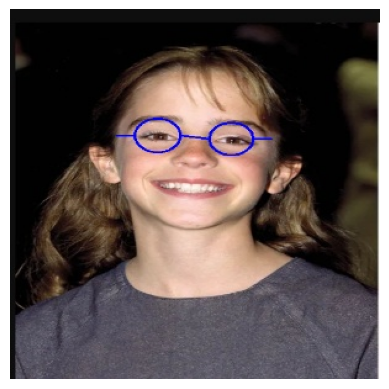

In [9]:
result = Image.open(output_file)
plt.imshow(result)
plt.axis('off')
plt.show()


In [10]:
image_path = r"D:\FastFile\PYTHON\Images\zel.jpg"
output_file = r"D:\FastFile\PYTHON\output.jpg"
process_image(image_path, output_file)


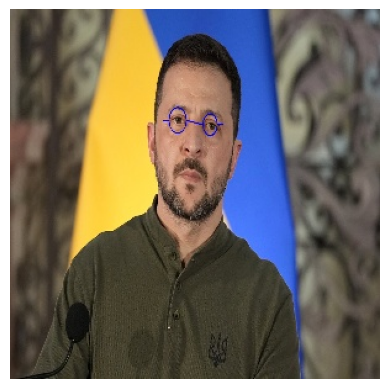

In [11]:
result = Image.open(output_file)
plt.imshow(result)
plt.axis('off')
plt.show()
